In [1]:
import sys
sys.path.append('../..')

In [2]:
from typing import List, Tuple, Dict
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from survival_tests.schedule import survival_curve_from_schedule, termination_curve_from_train_data
from survival_tests.survival_curves import prepare_survival_curves_for_plot, plot_survival_funcs, create_scenario

In [4]:
plot = False

CUTOFF = 10
SCHEDULE1: List[Tuple[int, float]] = [(1, 2), (2, 6), (3, -1)]
SCHEDULE2: List[Tuple[int, float]] = [(4, -1)]
SCHEDULE3: List[Tuple[int, float]] = [(3, 5), (2, 6), (3, -1)]

event_times = [
    [1, 3, 5, 7, 9], 
    [2, 4, 6, 8],
    [1, 2, 3, 4, 5, 6, 7, 8, 9],
    [5]
]

survival_functions = [
    [0.95, 0.9, 0.85, 0.8, 0.75], 
    [0.8, 0.5, 0.3, 0.1],
    [0.90, 0.81, 0.72, 0.63, 0.54, 0.45, 0.36, 0.27, 0.18],
    [0]
]

In [5]:
e1, s1 = survival_curve_from_schedule(SCHEDULE1, event_times, survival_functions, CUTOFF)
e2, s2 = survival_curve_from_schedule(SCHEDULE2, event_times, survival_functions, CUTOFF)
e3, s3 = survival_curve_from_schedule(SCHEDULE3, event_times, survival_functions, CUTOFF)

es = [e1, e2, e3]
ss = [s1, s2, s3]
es, ss = prepare_survival_curves_for_plot(es, ss, CUTOFF)

../..\survival_tests\survival_curves.py:139: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


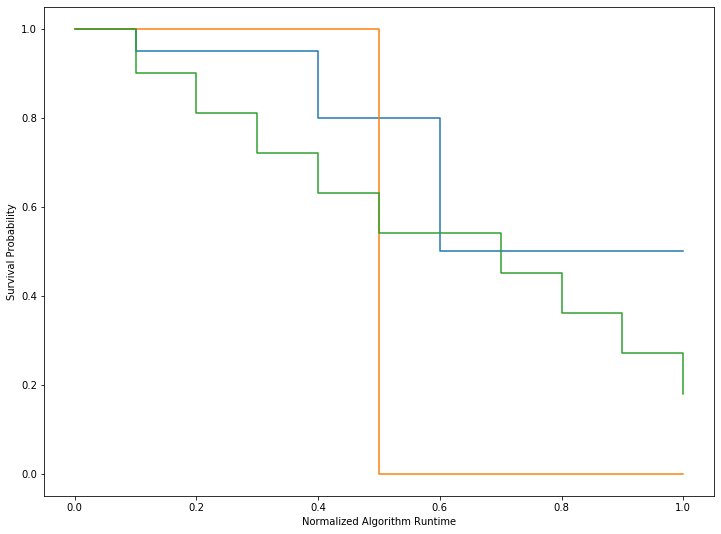

In [6]:
# %matplotlib widget 
plot_survival_funcs(es, ss, CUTOFF)

In [7]:
scenario_name = 'QBF-2011'
fold = 1

Optional file not found: ..\..\survival_tests\results\workspaces\aslib\QBF-2011\ground_truth.arff
Optional file not found: ..\..\survival_tests\results\workspaces\aslib\QBF-2011\feature_costs.arff
Have not found features_cutoff_time
Have not found features_cutoff_memory
Have not found features_stochastic
Found 114 duplicated feature vectors
Index(['C880.blif_0.10_0.20_0_0_out_exact',
       'C880.blif_0.10_0.20_0_1_out_exact',
       'Core1108_tbm_02.tex.moduleQ3.2S.000007',
       'Core1108_tbm_02.tex.moduleQ3.2S.000077',
       'Core1108_tbm_02.tex.moduleQ3.2S.000099',
       'Core1108_tbm_02.tex.moduleQ3.2S.000108',
       'Core1108_tbm_03.tex.module.000038',
       'Core1108_tbm_03.tex.module.000039',
       'Core1108_tbm_03.tex.moduleQ3.2S.000002',
       'Core1108_tbm_03.tex.moduleQ3.2S.000009',
       ...
       'robots_1_5_5_8.4', 'robots_1_5_5_87.4', 'robots_1_5_5_93.4',
       'robots_1_5_5_95.8', 'robots_1_5_5_97.2', 'robots_1_5_5_99.8',
       'test1_quant2', 'test1_quant_s

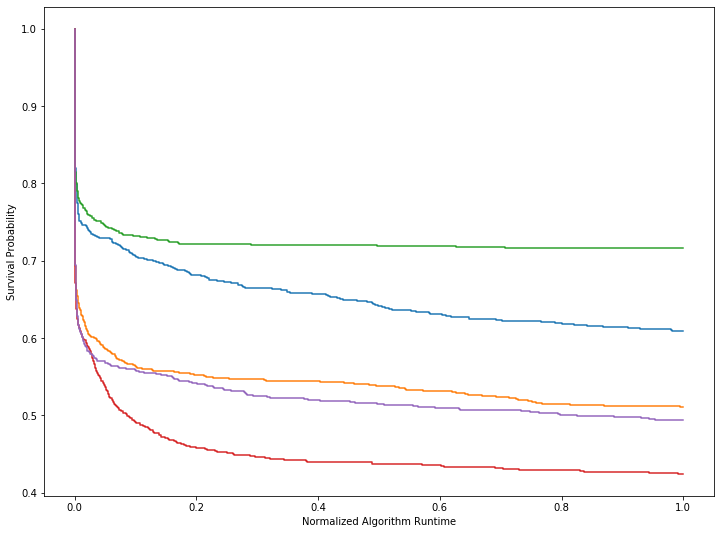

In [8]:
scenario = create_scenario(scenario_name, '../../survival_tests/results/workspaces/aslib/')
_, train_scenario = scenario.get_split(indx=fold)
cutoff = train_scenario.algorithm_cutoff_time

event_times, termination_curves = termination_curve_from_train_data(train_scenario.performance_data, cutoff)
plot_survival_funcs(event_times, termination_curves, cutoff)

In [9]:
termination_times: Dict[str, List[float]] = {
'a1' : [100, 100, 100, 100, 100],
'a2' : [1, 2, 3, 4, 5],
'a3' : [10, 8, 6, 4, 2],
'a4' : [2, 1, 2, 1, 2],
'a5' : [7, 3, 2, 100, 6],
}
PERFORMANCE_DATA = pd.DataFrame(termination_times)
CUTOFF = 10

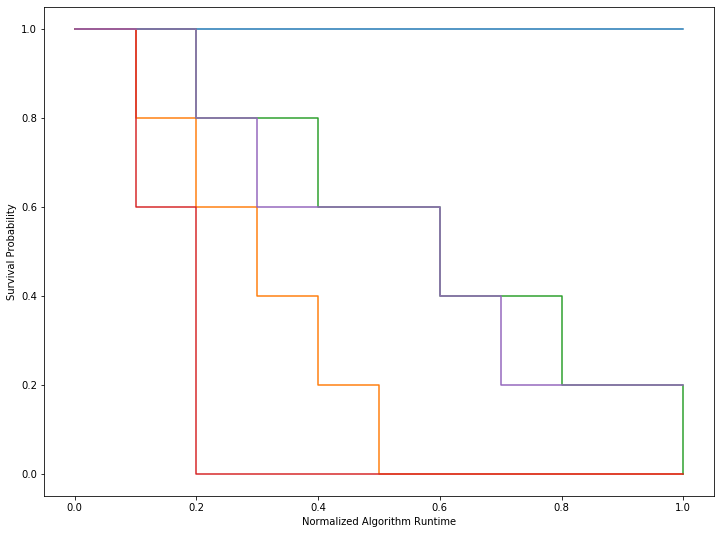

In [10]:
event_times2, termination_curves2 = termination_curve_from_train_data(PERFORMANCE_DATA, CUTOFF)
plot_survival_funcs(event_times2, termination_curves2, CUTOFF)